<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_

---


### Visualising Terminal and Transit Data.


Scenario: You have been tasked to analyse the drop in Transit and Terminal passengers from April 2019 and April 2020 using your new found python skills to present to a team of data anaylsts and senior members of the organisation.

- Use some graphs to demonstrate your findings. 

- You may include other data from previous years to support wider findings.

- Use juypter cells (In Markdown mode) to add text in between graphs. 

- Explain your findings using your figures (within the notebook) 

#### Where to look:

- [Pandas Plot Cheat Sheet](https://www.enthought.com/wp-content/uploads/2019/09/Enthought-Pandas-Cheat-Sheet-1-Plotting-with-Series-and-DataFrames-v1.0.2.pdf)

- [Pandas general Cheat Sheet](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)

- [Markdown cheat sheet](https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)

- [Public CAA Data (Table 09) - Terminal and Transit Data from 2018 (and all other years!)](https://www.caa.co.uk/Data-and-analysis/UK-aviation-market/Airports/Datasets/UK-Airport-data/Airport-data-2018-04/)
- Python Data viz lab solutions (More a whistlestop tour to using different plots)

- Your notes from yesterday!

- The chart below :)

##### Notes
- There may be some data cleaning to do!
- Make sure you split up what you're doing within each cell by headings and an explaination on what you're trying to perform below.
- Feel free to edit the column names for easy access. 


### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

[How to choose the right visualisations](https://flourish.studio/2018/09/28/choosing-the-right-visualisation/)

![Chart Suggestions](./chart_suggestions.png)



In [1]:
#Importing all libraries for later use. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6) # Increase figure size x , y
plt.rcParams['font.size'] = 14 # increase font sizes

In [2]:
# Read in the terminal/transit data.
tt_pax_data = './data/terminal_transit_pax_data.csv'
df= pd.read_csv(tt_pax_data)

df.head()


,rundate,this_period,last_period,reporting_airport_group_name,reporting_airport_name,total_pax_this_period,total_pax_last_period,total_pax_percent,terminal_pax_this_period,terminal_pax_last_period,terminal_pax_percent,transit_pax_this_period,transit_pax_last_period,transit_pax_percent
0,7/24/2020 11:08:59 AM,202004,201904,Other UK Airports,ABERDEEN,32964,239815,-86.254404,32964,239815,-86.254404,0,0,Null
1,7/24/2020 11:08:59 AM,202004,201904,Non UK Reporting Airports,ALDERNEY,120,4578,-97.378768,120,4578,-97.378768,0,0,Null
2,7/24/2020 11:08:59 AM,202004,201904,Other UK Airports,BARRA,69,1412,-95.113314,69,1412,-95.113314,0,0,Null
3,7/24/2020 11:08:59 AM,202004,201904,Other UK Airports,BELFAST CITY (GEORGE BEST),2503,211050,-98.814025,2503,211050,-98.814025,0,0,Null
4,7/24/2020 11:08:59 AM,202004,201904,Other UK Airports,BELFAST INTERNATIONAL,0,542166,Null,0,542166,Null,0,0,Null


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rundate                       51 non-null     object
 1   this_period                   51 non-null     int64 
 2   last_period                   51 non-null     int64 
 3   reporting_airport_group_name  51 non-null     object
 4   reporting_airport_name        51 non-null     object
 5   total_pax_this_period         51 non-null     int64 
 6   total_pax_last_period         51 non-null     int64 
 7   total_pax_percent             51 non-null     object
 8   terminal_pax_this_period      51 non-null     int64 
 9   terminal_pax_last_period      51 non-null     int64 
 10  terminal_pax_percent          51 non-null     object
 11  transit_pax_this_period       51 non-null     int64 
 12  transit_pax_last_period       51 non-null     int64 
 13  transit_pax_percent   

## Start entering your heading here
And explain what youre going to do in the next couple cells

Hint: A good first start is to look at your dataset(s), and plan what trends you can see/or would like to show. 
For example: A change in passenger percentage over the past couple/few years

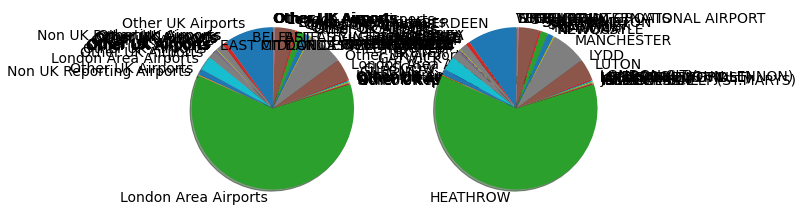

In [33]:
#And then add your code

fig1, ax = plt.subplots(ncols=2)
ax[0].pie(df.total_pax_this_period,  labels=df.reporting_airport_group_name, shadow=True, startangle=90)

ax[1].pie(df.total_pax_this_period,  labels=df.reporting_airport_name, shadow=True, startangle=90)

plt.show()

33.1


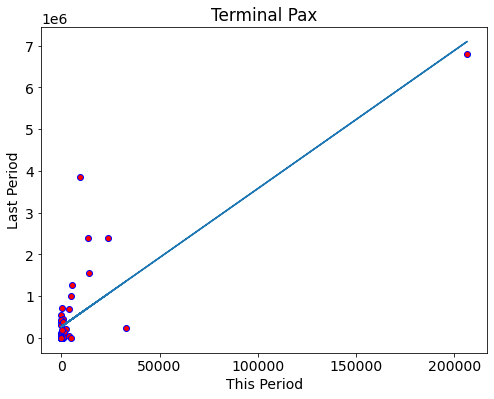

In [114]:
fig, ax = plt.subplots()

ax.scatter(x=df.terminal_pax_this_period, y=df.terminal_pax_last_period, marker='o', c='r', edgecolor='b')
ax.set_title('Terminal Pax')
ax.set_xlabel('This Period')
ax.set_ylabel('Last Period')

m, b = np.polyfit(df.terminal_pax_this_period, df.terminal_pax_last_period, 1)
print(m.round(1))
ax.plot(df.terminal_pax_this_period, m*df.terminal_pax_this_period + b)

65.0


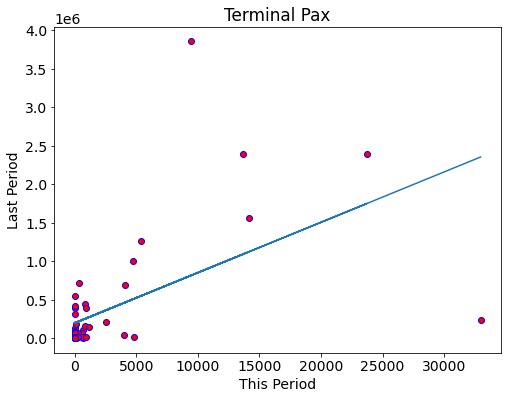

In [115]:
fig, ax = plt.subplots()

df2 = df[df.terminal_pax_this_period < 200000]

ax.scatter(x=df2.terminal_pax_this_period, y=df2.terminal_pax_last_period, marker='o', c='r', edgecolor='b')
ax.set_title('Terminal Pax')
ax.set_xlabel('This Period')
ax.set_ylabel('Last Period')

m, b = np.polyfit(df2.terminal_pax_this_period, df2.terminal_pax_last_period, 1)
print(m.round())
ax.plot(df2.terminal_pax_this_period, m*df2.terminal_pax_this_period + b)

86.82467405341494


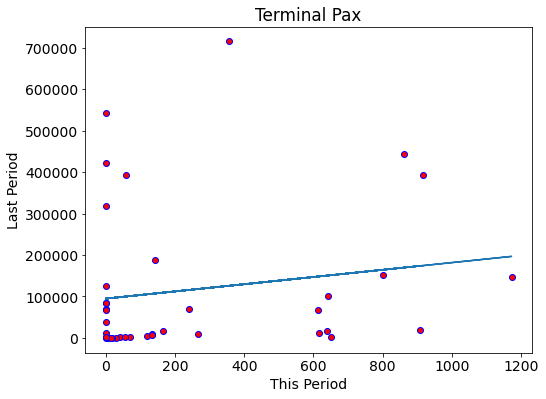

In [96]:
fig, ax = plt.subplots()

df3 = df[df.terminal_pax_this_period < 2000]

ax.scatter(x=df3.terminal_pax_this_period, y=df3.terminal_pax_last_period, marker='o', c='r', edgecolor='b')
ax.set_title('Terminal Pax')
ax.set_xlabel('This Period')
ax.set_ylabel('Last Period')

m, b = np.polyfit(df3.terminal_pax_this_period, df3.terminal_pax_last_period, 1)
print(m)
ax.plot(df3.terminal_pax_this_period, m*df3.terminal_pax_this_period + b)

65.46890131264138


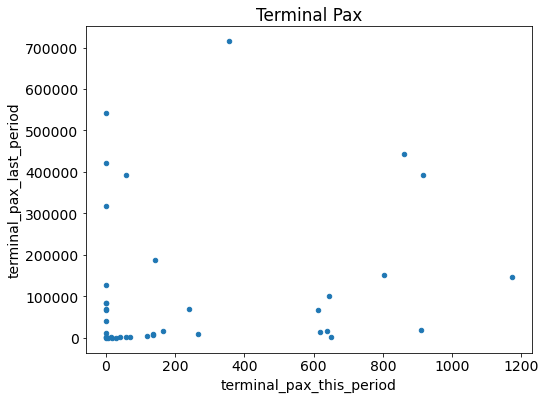

In [120]:
df3.plot(
    x='terminal_pax_this_period', 
    y='terminal_pax_last_period', 
    #marker='o', c='r', edgecolor='b')
    title = 'Terminal Pax',
    kind='scatter',

#ax.set_xlabel('This Period')
#ax.set_ylabel('Last Period')
    #ylim = (0,4000)
)

#m, b = np.polyfit(df.terminal_pax_this_period, df.terminal_pax_last_period, 1)
print(m)
#ax.plot(df.terminal_pax_this_period, m*df.terminal_pax_this_period + b)

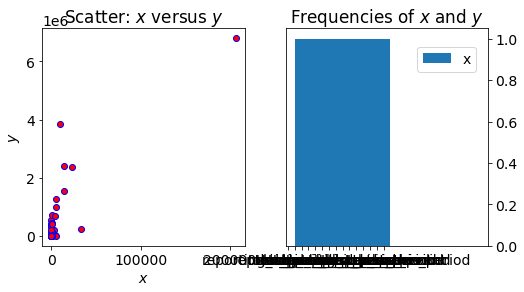

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=df.terminal_pax_this_period, y=df.terminal_pax_last_period, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

df['rounded_pax_this_period'] = df.terminal_pax_this_period.round(decimals=-3)

df2 = df.rounded_pax_this_period.value_counts()

ax2.hist(df, bins=np.arange(df2.min(), df2.max()),label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

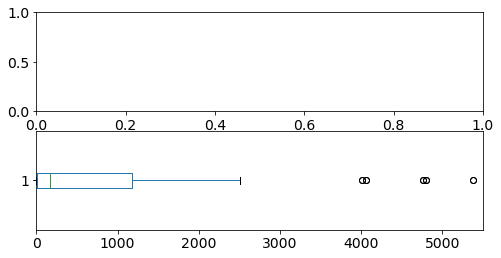

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))

ax1 = df['total_pax_this_period'].plot(kind='box',vert = False,xlim=(0,5500))
ax2 = df['total_pax_this_period'].plot(kind='box',vert = False,xlim=(0,5500))

<AxesSubplot:>

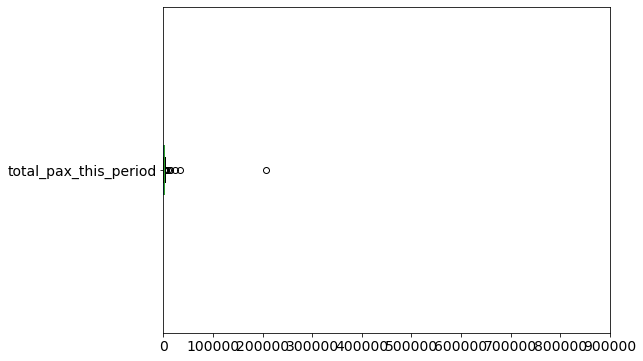

In [69]:
df['total_pax_this_period'].plot(kind='box',vert = False,xlim=(0,5500))

<AxesSubplot:>

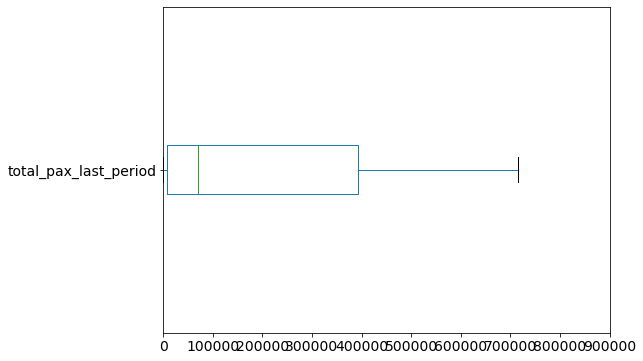

In [68]:
df['total_pax_last_period'].plot(kind='box',vert = False,xlim=(0,900000))

<AxesSubplot:>

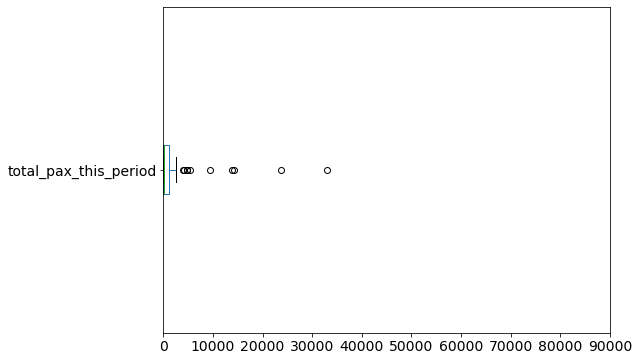

In [70]:
df['total_pax_this_period'].plot(kind='box',vert = False,xlim=(0,90000))